# Import

## Library

In [45]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Logistic Regression Clasificator
from sklearn.linear_model import LogisticRegression
# import warnings
# warnings.filterwarnings('ignore')

from PIL import Image
import numpy as np

from keras.layers import Dropout
from tensorflow.keras import regularizers


TensorFlow version: 2.12.0


## Dataset

In [46]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist

### Split

In [47]:
# Split dataset in data of Train and Data od Test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
x_train, x_val, y_train, y_val  = train_test_split( x_train, y_train, test_size=0.166, random_state=4)

### Information of Data

The pixel values of the images range from __0__ through __255__. Scale these values to a range of __0__ to **1** by dividing the values by __255.0__. This also converts the sample data from integers to floating-point numbers:

In [49]:
x_train,x_val, x_test = x_train / 255.0, x_val/ 255.0, x_test / 255.0

In [50]:
print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}\n')

print(f'x_val.shape : {x_val.shape}')
print(f'y_val.shape : {y_val.shape}\n')

print(f'x_test.shape : {x_test.shape}')
print(f'y_test.shape : {y_test.shape}\n')

x_train.shape : (50040, 28, 28)
y_train.shape : (50040,)

x_val.shape : (9960, 28, 28)
y_val.shape : (9960,)

x_test.shape : (10000, 28, 28)
y_test.shape : (10000,)



In [51]:
x_train[0].shape

(28, 28)

In [52]:
type(x_train)

numpy.ndarray

![](MNIST.png)

# Build a machine learning model

## Build a tf.keras.Sequential model:

![](1_N8UXaiUKWurFLdmEhEHiWg.jpg)

In [53]:
model = tf.keras.models.Sequential([

# Input Layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden Layer

  tf.keras.layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#   tf.keras.layers.BatchNormalization(),#regularización y reducir el sobreajuste del modelo
  tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo

  tf.keras.layers.Dense(416, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#   tf.keras.layers.BatchNormalization(),#regularización y reducir el sobreajuste del modelo
  tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo
    
  tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#   tf.keras.layers.BatchNormalization(),#regularización y reducir el sobreajuste del modelo
  tf.keras.layers.Dropout(0.3),#regularización y reducir el sobreajuste del modelo

 # Outoput Layer
  tf.keras.layers.Dense(10,activation='softmax'), #Esta capa tiene 10 neuronas, clasificación de 10 categorías
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 416)               326560    
                                                                 
 dropout_4 (Dropout)         (None, 416)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               213504    
                                                                 
 dropout_5 (Dropout)         (None, 512)              

### Detalles 

- __tf.keras.layers.Flatten__ (La capa de aplanamiento ) es una capa de procesamiento que convierte una matriz de __entrada multidimensional__ en un vector __unidimensional__. Esta capa se utiliza comúnmente como la primera capa en una red neuronal para transformar los datos de entrada. La capa de aplanamiento toma una matriz de entrada de __28x28__ (que representa una imagen de __28x28__ píxeles) y la convierte en un vector de __784__ elementos. Esto permite que la red neuronal procese la imagen como una __secuencia unidimensional__ de valores de píxeles en lugar de como una matriz bidimensional.<br><br>

- __tf.keras.layers.Dense__ es una capa de redes neuronales __densamente conectada__ en TensorFlow, que implementa la operación de multiplicación de matriz y adición de sesgo en la entrada, seguida de una función de activación. Cada unidad o nodo en la capa está conectado a cada unidad en la capa anterior, y las entradas se multiplican por un conjunto de pesos y se suman a un sesgo antes de aplicar la función de activación. En otras palabras, la capa densa es una capa de neuronas completamente conectada, donde cada neurona en la capa anterior está conectada a todas las neuronas en la capa actual. La capa __Dense__ en la red neuronal se llama así porque __cada neurona de la capa está conectada a todas las neuronas de la capa anterior y de la capa siguiente__. Esto se conoce como __"conexión densa"__ o __"totalmente conectada"__. Los valores de entrada se multiplican por los pesos, se suman los resultados y se aplica una función de activación para producir los valores de salida de la capa.En resumen, la capa Dense es una capa de red neuronal en la que cada neurona está conectada a todas las neuronas de la capa anterior y de la capa siguiente, lo que permite aprender patrones complejos en los datos<br><br>

- __tf.keras.layers.Dropout__ es una capa en TensorFlow que se utiliza para regularizar modelos de aprendizaje profundo y evitar el sobreajuste. Durante el entrenamiento, Dropout apaga de forma aleatoria un número predefinido de unidades de la capa anterior. Esto evita que las unidades se "especialicen" demasiado en un subconjunto particular de los datos de entrenamiento, lo que puede resultar en un modelo que no generaliza bien a datos nuevos. El porcentaje de unidades que se apaga se puede ajustar mediante un parámetro llamado "rate".<br>


Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

### predictions example

For each example, the model returns a vector of __logits or log-odds scores__, one for each class

In [54]:
# predictions = model(x_train[:1]).numpy()

# for i, value in enumerate(predictions[0]):
#     print(f'{i} : {value}')

### converts these logits to probabilities

The __tf.nn.softmax__ function converts these logits to probabilities for each class:

In [55]:
# tf.nn.softmax(predictions).numpy()

## Define a loss function (Hyperparameter)

Define a loss function for training using __losses.SparseCategoricalCrossentropy__:

In [56]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The __loss function__ takes a __vector of ground truth values__ and a __vector of logits__ and __returns a scalar loss for each example__. This __loss__ is equal to the __negative log probability of the true class__: The __loss__ is __0__ if the model is sure of the __correct__ class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

## Set the optimizer (Hyperparameter)

In [57]:
model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

### Detail

Adam (Adaptive Moment Estimation) es un __algoritmo de optimización__ de __gradiente descendente estocástico__ utilizado comúnmente para entrenar redes neuronales en el aprendizaje profundo.

Adam es un __método de optimización adaptativo__ que combina el enfoque de __Momentum__ y __RMSprop__. Al igual que RMSprop, Adam mantiene un promedio móvil de los cuadrados de los gradientes y, al igual que el enfoque de Momentum, mantiene un __promedio móvil de los gradientes__.

El algoritmo adapta la tasa de aprendizaje de cada parámetro en función de la magnitud del gradiente y la magnitud de la media móvil de segundo orden de los gradientes. Adam también incluye un término de corrección de sesgo para compensar la inicialización sesgada de los promedios móviles en las primeras iteraciones.

En resumen, Adam es un algoritmo de optimización de gradiente descendente estocástico que adapta la tasa de aprendizaje para cada parámetro en función de la magnitud del gradiente y la media móvil de segundo orden de los gradientes. Es muy popular en el aprendizaje profundo debido a su eficacia y eficiencia en la práctica.

durante el el entrenamiento el leaning rate en adam varia?


Sí, durante el entrenamiento, el optimizador __Adam__ puede __ajustar automáticamente la tasa de aprendizaje__. Adam utiliza un algoritmo adaptativo para calcular y actualizar la tasa de aprendizaje de forma dinámica en función de las estadísticas de los gradientes calculados durante el entrenamiento.

__El algoritmo de Adam incluye dos componentes principales__: el __promedio móvil de primer orden (momentum)__ y __el promedio móvil de segundo orden (adaptive learning rate)__. Estos componentes permiten que Adam ajuste la tasa de aprendizaje para cada parámetro del modelo de forma individual, basándose en la magnitud de los gradientes y las características del historial de actualizaciones anteriores.

A medida que el modelo se entrena y se actualizan los pesos, Adam adapta la tasa de aprendizaje de forma automática según la información acumulada de los gradientes previos. Esto puede ayudar a mejorar la eficiencia del entrenamiento y la capacidad del modelo para converger hacia una solución óptima.

Es importante destacar que el algoritmo de Adam tiene valores predeterminados para otros hiperparámetros, como el momentum y el decaimiento de los promedios móviles. Estos hiperparámetros también pueden influir en la forma en que Adam ajusta la tasa de aprendizaje durante el entrenamiento.

Si deseas tener un control más preciso sobre la tasa de aprendizaje y su variación durante el entrenamiento, puedes utilizar optimizadores personalizados o técnicas de programación de aprendizaje con tasas de aprendizaje variables. Sin embargo, en la mayoría de los casos, Adam es una opción sólida y eficiente que ajusta automáticamente la tasa de aprendizaje de manera efectiva para la mayoría de los problemas de aprendizaje profundo.

# Train and evaluate your model

## History

Use the __Model.fit__ Method to adjust your model parameters and minimize the loss:

In [58]:
n_epoch = 20

history = model.fit(
    x_train, 
    y_train,  
    epochs=n_epoch, 
    verbose=1, 
    validation_data=(x_val, y_val))

Epoch 1/20


C:\Users\blasf\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1564/1564 [==============================] - 44s 24ms/step - loss: 0.4272 - accuracy: 0.9144 - val_loss: 0.2928 - val_accuracy: 0.9542
Epoch 2/20
1564/1564 [==============================] - 37s 24ms/step - loss: 0.3008 - accuracy: 0.9531 - val_loss: 0.2532 - val_accuracy: 0.9678
Epoch 3/20
1564/1564 [==============================] - 49s 31ms/step - loss: 0.2718 - accuracy: 0.9619 - val_loss: 0.2673 - val_accuracy: 0.9654
Epoch 4/20
1564/1564 [==============================] - 54s 35ms/step - loss: 0.2580 - accuracy: 0.9658 - val_loss: 0.2384 - val_accuracy: 0.9724
Epoch 5/20
1564/1564 [==============================] - 52s 33ms/step - loss: 0.2467 - accuracy: 0.9682 - val_loss: 0.2372 - val_accuracy: 0.9715
Epoch 6/20
1564/1564 [==============================] - 52s 33ms/step - loss: 0.2419 - accuracy: 0.9686 - val_loss: 0.2348 - val_accuracy: 0.9690
Epoch 7/20
1564/1564 [==============================] - 49s 32ms/step - loss: 0.2367 - accuracy: 0.9700 - val_loss: 0.2259 - val_accura

# Grafics

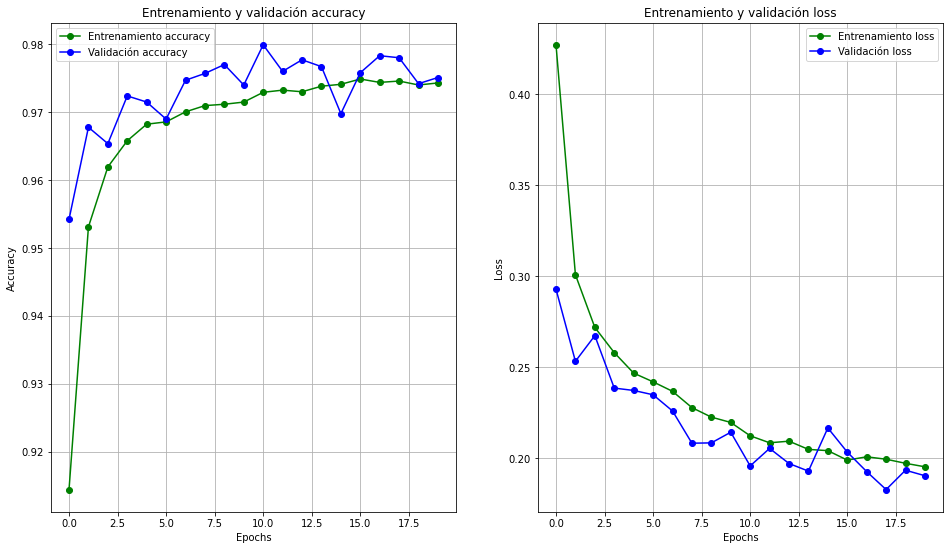

In [59]:
def visualizacion_resultados(n,history):
    epochs = [i for i in range( n  )]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    val_acc = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    fig.set_size_inches(16,9)

    ax[0].plot(epochs, train_acc, "go-",label = "Entrenamiento accuracy")
    ax[0].plot(epochs, val_acc, "bo-",label = "Validación accuracy")
    ax[0].set_title("Entrenamiento y validación accuracy")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].grid()

    ax[1].plot(epochs, train_loss, "go-",label = "Entrenamiento loss")
    ax[1].plot(epochs, val_loss, "bo-",label = "Validación loss")
    ax[1].set_title("Entrenamiento y validación loss")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].grid()
    

    plt.show() 
visualizacion_resultados(n_epoch,history)

In [60]:
# n_epoch

# evaluate for examples

The __Model.evaluate__ method checks the model's performance, usually on a validation set or test set.

In [61]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 5s - loss: 0.1886 - accuracy: 0.9773 - 5s/epoch - 15ms/step


[0.18860626220703125, 0.9772999882698059]

In [62]:
predictions = model(x_test[:1]).numpy()

for i, value in enumerate(predictions[0]):
    print(f'{i} : {value}')


0 : 6.10358057429039e-08
1 : 5.081306539977959e-07
2 : 1.1827904017991386e-05
3 : 3.6590521631296724e-05
4 : 4.972823148818861e-07
5 : 3.8569743310290505e-07
6 : 9.516025467615208e-11
7 : 0.9999425411224365
8 : 9.479988705152209e-08
9 : 7.532899417128647e-06


In [63]:
xaux=x_test
yauc=y_test
for n in range(0,10)  :
    predictions = model(xaux[n:n+1]).numpy()

    arr = tf.nn.softmax(predictions).numpy()[0]

    # Convertimos el array a un diccionario
    dict_arr = dict(zip(range(len(arr)), arr.tolist()))

    d_ordenado = dict(sorted(dict_arr.items(), key=lambda x: x[1], reverse=True))

    for key, value in d_ordenado.items():
        print( "El valor real  [", yauc[n], '] predicho :[',key, "] con", value*100,'probabilidad','\n')
    print('<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

    

El valor real  [ 7 ] predicho :[ 7 ] con 23.195794224739075 probabilidad 

El valor real  [ 7 ] predicho :[ 3 ] con 8.534058928489685 probabilidad 

El valor real  [ 7 ] predicho :[ 2 ] con 8.533847332000732 probabilidad 

El valor real  [ 7 ] predicho :[ 9 ] con 8.533810079097748 probabilidad 

El valor real  [ 7 ] predicho :[ 1 ] con 8.533751219511032 probabilidad 

El valor real  [ 7 ] predicho :[ 4 ] con 8.533750474452972 probabilidad 

El valor real  [ 7 ] predicho :[ 5 ] con 8.533748984336853 probabilidad 

El valor real  [ 7 ] predicho :[ 0 ] con 8.533746749162674 probabilidad 

El valor real  [ 7 ] predicho :[ 8 ] con 8.533746749162674 probabilidad 

El valor real  [ 7 ] predicho :[ 6 ] con 8.533746004104614 probabilidad 

<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
El valor real  [ 2 ] predicho :[ 2 ] con 23.186492919921875 probabilidad 

El valor real  [ 2 ] predicho :[ 1 ] con 8.538253605365753 probabilidad 

El valor real  [ 2 ] predicho :[ 6 ] con 8.5

In [64]:
for i in range(50) : 
    print(i,y_train[i])

0 4
1 3
2 5
3 0
4 7
5 0
6 5
7 0
8 1
9 8
10 0
11 9
12 3
13 8
14 5
15 1
16 7
17 9
18 3
19 8
20 5
21 6
22 1
23 6
24 1
25 0
26 4
27 2
28 1
29 9
30 5
31 3
32 1
33 7
34 8
35 9
36 1
37 1
38 1
39 1
40 2
41 9
42 2
43 7
44 8
45 6
46 9
47 1
48 0
49 8
